In [38]:
# %%
import warnings
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=999
pd.options.display.max_rows = 999

## KONFIGURASI PANDAS DAN PLOT ##
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.option_context("display.max_rows", 100)

# set the style of the axes and the text color
plt.rcParams['figure.figsize'] = (12.0, 5.0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("bright")

# %%
def get_information_values(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    data_iv, data_woe = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp = pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        data_iv = pd.concat([data_iv, temp], axis=0)
        data_woe = pd.concat([data_woe, d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)

    return data_iv, data_woe

# %%
## IMPORT DATASET
#data_train_april = pd.read_csv("data_billing_april_new_dpd.csv", header=0, low_memory=False)
#data_train_mei = pd.read_csv("data_billing_mei_new_dpd.csv", header=0, low_memory=False)
data_train=pd.read_csv('dataset HR analytics.csv', header=0, low_memory=False)

In [39]:
data_train.columns.tolist()

['Employee_Name',
 'EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'RoleID',
 'LevelID',
 'PerfScoreID',
 'Tribe',
 'Squad',
 'DOB',
 'RaceDesc',
 'DateofHire',
 'DateofTermination',
 'TermReason',
 'EmploymentStatus',
 'RecruitmentSource',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'LastPerformanceReview_Date',
 'DaysLateLast30',
 'Absences']

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               287 non-null    object 
 1   EmpID                       287 non-null    int64  
 2   MarriedID                   287 non-null    object 
 3   MaritalStatusID             287 non-null    object 
 4   GenderID                    287 non-null    object 
 5   EmpStatusID                 287 non-null    object 
 6   RoleID                      287 non-null    object 
 7   LevelID                     287 non-null    object 
 8   PerfScoreID                 287 non-null    object 
 9   Tribe                       287 non-null    object 
 10  Squad                       287 non-null    object 
 11  DOB                         287 non-null    object 
 12  RaceDesc                    287 non-null    object 
 13  DateofHire                  287 non

# 1.Hitung Jumlah Null tiap kolom


<AxesSubplot:title={'center':'Kolom yang memiliki Null(1/24)'}>

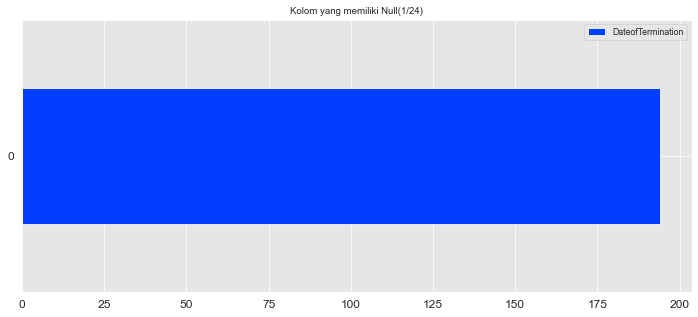

In [40]:
#hitung jumlah NULL dalam setiap kolom
# Count total NaN at each column in a DataFrame 
data_null = pd.DataFrame(data_train.isnull().sum())
data_null = data_null.transpose()
data_null_filter=data_null.loc[:, (data_null != 0).any(axis=0)]
data_null_filter.plot(kind='barh',title='Kolom yang memiliki Null(1/24)',fontsize=12)

In [17]:
data_train.fillna('7/24/2021', inplace=True)
data_train.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
RoleID                        0
LevelID                       0
PerfScoreID                   0
Tribe                         0
Squad                         0
DOB                           0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
RecruitmentSource             0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
dtype: int64

In [18]:
#Drop Fitur yang memiliki nilai null >70%
#data_train = data_train.drop(columns='DateofTermination')

In [19]:
#change to datetime
data_train['DOB'] = pd.to_datetime(data_train['DOB'])
data_train['DateofHire'] = pd.to_datetime(data_train['DateofHire'])
data_train['DateofTermination'] = pd.to_datetime(data_train['DateofTermination'])
data_train['LastPerformanceReview_Date'] = pd.to_datetime(data_train['LastPerformanceReview_Date'])

# 2.Imputasi Data numerik yang bernilai Null dengan nilai mean nya

In [20]:
#data_train.fillna('7/24/2021', inplace=True)
#data_train.isnull().sum()


## 2.1Data Numerik yang diimputasi : freq_creditl1m,	freq_debitl1m,	credit_amtl1m, debit_amtl1m, age

In [55]:
# fill missing values with mean column values
data_train['age'].fillna(data_train['age'].mean(), inplace=True)
data_train['freq_creditl1m'].fillna(data_train['freq_creditl1m'].mean(), inplace=True)
data_train['credit_amtl1m'].fillna(data_train['credit_amtl1m'].mean(), inplace=True)
data_train['debit_amtl1m'].fillna(data_train['debit_amtl1m'].mean(), inplace=True)
data_train['freq_debitl1m'].fillna(data_train['freq_debitl1m'].mean(), inplace=True)
data_train['limit'].fillna(data_train['limit'].mean(), inplace=True)

## 2.2Data Kategori yang diimputasi : detail_gender	detail_marital_status,	detail_last_education,	detail_occupation_type

In [56]:
data_train['detail_gender'].fillna(data_train['detail_gender'].mode(), inplace=True)
data_train['detail_gender'].fillna(data_train['detail_gender'].mode()[0], inplace=True)
data_train['detail_marital_status'].fillna(data_train['detail_marital_status'].mode()[0], inplace=True)
data_train['detail_last_education'].fillna(data_train['detail_last_education'].mode()[0], inplace=True)
data_train['detail_occupation_type'].fillna(data_train['detail_occupation_type'].mode()[0], inplace=True)

In [57]:
data_train.isnull().sum()

Unnamed: 0                0
acid                      0
oda                       0
acctno                    0
bill_gen_date             0
payment_due_date          0
payment_date              0
bill_amt                  0
adj_amt                   0
total_bill                0
total_adj                 0
total_adj_bill            0
avg_saldol1m              0
max_saldol1m              0
min_saldol1m              0
median_saldol1m           0
freq_creditl1m            0
freq_debitl1m             0
credit_amtl1m             0
debit_amtl1m              0
disp_income_amtl1m        0
ds_ts                     0
acct_opn_date             0
collectibility            0
hold_flag                 2
hold                      2
limit                     0
oda_status                0
posisi                    0
cif_id                    0
age                       0
detail_gender             0
detail_marital_status     0
detail_last_education     0
detail_occupation_type    0
grade               

In [58]:
#data_train.columns

# Hanya untuk tes PPS 

In [59]:
#data_train.drop(['acct_opn_date', 'first_trx'], axis=1)

In [60]:
#data_train.to_csv("%s_dataset_untuk_PPS.csv" % str(date.today().strftime("%Y%m%d")), index=False)

# Sampai sini

In [162]:
#data_train.head()

In [163]:
#data_train['device_used_nan'] = data_train['device_used_nan'].astype('int') 
#data_train["device_used_nan"].replace({False: 0, True: 1}, inplace=True)

#data_train.fraud.unique()

In [164]:
#data_train['fraud'] = data_train['fraud'].astype('int') 
#data_train["fraud"].replace({False: 0, True: 1}, inplace=True)

#data_train.dtypes

# 3 One-hot encoding categorical data

In [198]:
data_train.head()

Employee_Name  EmpID    MarriedID MaritalStatusID  \
0                        A Ridwan  10001  Not married          Single   
1                    Ade Setyanto  10002  Not married          Single   
2  Adhitya Bramantya Ranggatyasta  10003      Married        Divorced   
3              Adji Wijaya Kusuma  10004  Not married          Single   
4                Agus Andri Putra  10005  Not married          Single   

  GenderID     EmpStatusID            RoleID LevelID  PerfScoreID Tribe  \
0        M  TKP/ Outsource     Product Owner  Senior       Exceed   EWD   
1        M  TKP/ Outsource     Product Owner  Senior  Fully meets   EWD   
2        F  TKP/ Outsource     Product Owner  Senior      Average   ENT   
3        F  TKP/ Outsource  Business Analyst  Middle       Exceed   ENT   
4        F         Prohire  Business Analyst  Middle      Average   EDU   

                 Squad        DOB RaceDesc DateofHire         TermReason  \
0             Evaluate 1983-07-10    Sunda 2011-07-05  N/A-StillEmployed   
1                  Pay 1975-05-05    Sunda 2015-03-30      career change   
2            HunianAja 1988-09-19     Jawa 2011-07-05              hours   
3            Intermoda 1988-09-27     Cina 2008-01-07  N/A-StillEmployed   
4  Squad Pijar Sekolah 1989-09-08     Bali 2011-07-11   return to school   

         EmploymentStatus RecruitmentSource  EngagementSurvey  \
0                  Active          LinkedIn              4.60   
1  Voluntarily Terminated            Indeed              4.96   
2  Voluntarily Terminated          LinkedIn              3.02   
3                  Active            Indeed              4.84   
4  Voluntarily Terminated     Google Search              5.00   

   EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  \
0                5                     0                 2020-01-17   
1                3                     6                 2017-02-24   
2                3                     0                 2013-05-15   
3                5                     0                 2020-01-03   
4                4                     0                 2017-02-01   

   DaysLateLast30  Absences  
0               0         1  
1               0        17  
2               0         3  
3               0        15  
4               0         2

In [21]:
MarriedID  = pd.get_dummies(data_train.MarriedID, prefix='MarriedID')
MaritalStatusID = pd.get_dummies(data_train.MaritalStatusID, prefix='MaritalStatusID')
GenderID   = pd.get_dummies(data_train.GenderID, prefix='GenderID')
EmpStatusID=pd.get_dummies(data_train.EmpStatusID, prefix='EmpStatusID')
RoleID=pd.get_dummies(data_train.RoleID, prefix='RoleID')
LevelID=pd.get_dummies(data_train.LevelID, prefix='LevelID')
PerfScoreID=pd.get_dummies(data_train.PerfScoreID, prefix='PerfScoreID')
Tribe=pd.get_dummies(data_train.Tribe, prefix='Tribe')
Squad=pd.get_dummies(data_train.Squad, prefix='Squad')
#DOB=pd.get_dummies(data_train.DOB, prefix='DOB')
RaceDesc=pd.get_dummies(data_train.RaceDesc, prefix='RaceDesc')
TermReason=pd.get_dummies(data_train.TermReason, prefix='TermReason')
RecruitmentSource=pd.get_dummies(data_train.RecruitmentSource, prefix='RecruitmentSource')

In [22]:
data_train = pd.concat([data_train, MarriedID], axis=1)
data_train = pd.concat([data_train, MaritalStatusID], axis=1)
data_train = pd.concat([data_train, GenderID], axis=1)
data_train = pd.concat([data_train, EmpStatusID], axis=1)
data_train = pd.concat([data_train, RoleID], axis=1)
data_train = pd.concat([data_train, LevelID], axis=1)
data_train = pd.concat([data_train, PerfScoreID], axis=1)
data_train = pd.concat([data_train, Tribe], axis=1)
data_train = pd.concat([data_train, Squad], axis=1)
#data_train = pd.concat([data_train, DOB], axis=1)
data_train = pd.concat([data_train, RaceDesc], axis=1)
data_train = pd.concat([data_train, TermReason], axis=1)
data_train = pd.concat([data_train, RecruitmentSource], axis=1)

In [23]:
data_train.head()

Employee_Name  EmpID    MarriedID MaritalStatusID  \
0                        A Ridwan  10001  Not married          Single   
1                    Ade Setyanto  10002  Not married          Single   
2  Adhitya Bramantya Ranggatyasta  10003      Married        Divorced   
3              Adji Wijaya Kusuma  10004  Not married          Single   
4                Agus Andri Putra  10005  Not married          Single   

  GenderID     EmpStatusID            RoleID LevelID  PerfScoreID Tribe  \
0        M  TKP/ Outsource     Product Owner  Senior       Exceed   EWD   
1        M  TKP/ Outsource     Product Owner  Senior  Fully meets   EWD   
2        F  TKP/ Outsource     Product Owner  Senior      Average   ENT   
3        F  TKP/ Outsource  Business Analyst  Middle       Exceed   ENT   
4        F         Prohire  Business Analyst  Middle      Average   EDU   

                 Squad        DOB RaceDesc DateofHire DateofTermination  \
0             Evaluate 1983-07-10    Sunda 2011-07-05        2021-07-24   
1                  Pay 1975-05-05    Sunda 2015-03-30        2018-06-16   
2            HunianAja 1988-09-19     Jawa 2011-07-05        2014-09-24   
3            Intermoda 1988-09-27     Cina 2008-01-07        2021-07-24   
4  Squad Pijar Sekolah 1989-09-08     Bali 2011-07-11        2018-09-06   

          TermReason        EmploymentStatus RecruitmentSource  \
0  N/A-StillEmployed                  Active          LinkedIn   
1      career change  Voluntarily Terminated            Indeed   
2              hours  Voluntarily Terminated          LinkedIn   
3  N/A-StillEmployed                  Active            Indeed   
4   return to school  Voluntarily Terminated     Google Search   

   EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  \
0              4.60                5                     0   
1              4.96                3                     6   
2              3.02                3                     0   
3              4.84                5                     0   
4              5.00                4                     0   

  LastPerformanceReview_Date  DaysLateLast30  Absences  MarriedID_Married  \
0                 2020-01-17               0         1                  0   
1                 2017-02-24               0        17                  0   
2                 2013-05-15               0         3                  1   
3                 2020-01-03               0        15                  0   
4                 2017-02-01               0         2                  0   

   MarriedID_Not married  MaritalStatusID_Divorced  MaritalStatusID_Married  \
0                      1                         0                        0   
1                      1                         0                        0   
2                      0                         1                        0   
3                      1                         0                        0   
4                      1                         0                        0   

   MaritalStatusID_Single  MaritalStatusID_Widowed  GenderID_F  GenderID_M  \
0                       1                        0           0           1   
1                       1                        0           0           1   
2                       0                        0           1           0   
3                       1                        0           1           0   
4                       1                        0           1           0   

   EmpStatusID_Karyawan Organik  EmpStatusID_Prohire  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    1   

   EmpStatusID_TKP/ Outsource  RoleID_Artificial Intelligent  \
0                           1                              0   
1                           1        

## 3.1 Drop columns categorical data without one-hot encoding

In [24]:
data_train = data_train.drop(['MarriedID','MaritalStatusID','GenderID','EmpStatusID','RoleID','LevelID','PerfScoreID','Tribe'
                             ,'Squad','RaceDesc','RecruitmentSource','TermReason'],axis=1)

# Add 4 new columns

In [25]:
data_train['age_until_hire'] = data_train['DateofHire']-data_train['DOB'] #in days
data_train['hire_to_review']= data_train['LastPerformanceReview_Date']-data_train['DateofHire'] #in days
data_train['empSatisfaction_to_Absences'] = data_train['EmpSatisfaction']/data_train['Absences']
data_train['Working_Time'] = data_train['DateofTermination'] - data_train['DateofHire']

In [26]:
data_train.head()

Employee_Name  EmpID        DOB DateofHire  \
0                        A Ridwan  10001 1983-07-10 2011-07-05   
1                    Ade Setyanto  10002 1975-05-05 2015-03-30   
2  Adhitya Bramantya Ranggatyasta  10003 1988-09-19 2011-07-05   
3              Adji Wijaya Kusuma  10004 1988-09-27 2008-01-07   
4                Agus Andri Putra  10005 1989-09-08 2011-07-11   

  DateofTermination        EmploymentStatus  EngagementSurvey  \
0        2021-07-24                  Active              4.60   
1        2018-06-16  Voluntarily Terminated              4.96   
2        2014-09-24  Voluntarily Terminated              3.02   
3        2021-07-24                  Active              4.84   
4        2018-09-06  Voluntarily Terminated              5.00   

   EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  \
0                5                     0                 2020-01-17   
1                3                     6                 2017-02-24   
2                3                     0                 2013-05-15   
3                5                     0                 2020-01-03   
4                4                     0                 2017-02-01   

   DaysLateLast30  Absences  MarriedID_Married  MarriedID_Not married  \
0               0         1                  0                      1   
1               0        17                  0                      1   
2               0         3                  1                      0   
3               0        15                  0                      1   
4               0         2                  0                      1   

   MaritalStatusID_Divorced  MaritalStatusID_Married  MaritalStatusID_Single  \
0                         0                        0                       1   
1                         0                        0                       1   
2                         1                        0                       0   
3                         0                        0                       1   
4                         0                        0                       1   

   MaritalStatusID_Widowed  GenderID_F  GenderID_M  \
0                        0           0           1   
1                        0           0           1   
2                        0           1           0   
3                        0           1           0   
4                        0           1           0   

   EmpStatusID_Karyawan Organik  EmpStatusID_Prohire  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    1   

   EmpStatusID_TKP/ Outsource  RoleID_Artificial Intelligent  \
0                           1                              0   
1                           1                              0   
2                           1                              0   
3                           1                              0   
4                           0                              0   

   RoleID_Back End Developer  RoleID_Business Analyst  RoleID_DevOps Engineer  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        1                       0   
4                          0                        1                       0   

   RoleID_Digital Product Manager  RoleID_Front End Developer  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                         

In [27]:
age_until_hire_day = []
hire_to_review_day = []
working_time = []

for i in range(data_train.shape[0]):
    age_until_hire_day.append(data_train.age_until_hire.iloc[i].days)
    hire_to_review_day.append(data_train.hire_to_review.iloc[i].days)
    working_time.append(data_train.Working_Time.iloc[i].days)

data_train['age_when_hire_day'] = age_until_hire_day
data_train['hire_to_review_day']= hire_to_review_day
data_train['working_time']= working_time

data_train = data_train.drop(columns=['age_until_hire','hire_to_review','Working_Time'])
data_train.head()

Employee_Name  EmpID        DOB DateofHire  \
0                        A Ridwan  10001 1983-07-10 2011-07-05   
1                    Ade Setyanto  10002 1975-05-05 2015-03-30   
2  Adhitya Bramantya Ranggatyasta  10003 1988-09-19 2011-07-05   
3              Adji Wijaya Kusuma  10004 1988-09-27 2008-01-07   
4                Agus Andri Putra  10005 1989-09-08 2011-07-11   

  DateofTermination        EmploymentStatus  EngagementSurvey  \
0        2021-07-24                  Active              4.60   
1        2018-06-16  Voluntarily Terminated              4.96   
2        2014-09-24  Voluntarily Terminated              3.02   
3        2021-07-24                  Active              4.84   
4        2018-09-06  Voluntarily Terminated              5.00   

   EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  \
0                5                     0                 2020-01-17   
1                3                     6                 2017-02-24   
2                3                     0                 2013-05-15   
3                5                     0                 2020-01-03   
4                4                     0                 2017-02-01   

   DaysLateLast30  Absences  MarriedID_Married  MarriedID_Not married  \
0               0         1                  0                      1   
1               0        17                  0                      1   
2               0         3                  1                      0   
3               0        15                  0                      1   
4               0         2                  0                      1   

   MaritalStatusID_Divorced  MaritalStatusID_Married  MaritalStatusID_Single  \
0                         0                        0                       1   
1                         0                        0                       1   
2                         1                        0                       0   
3                         0                        0                       1   
4                         0                        0                       1   

   MaritalStatusID_Widowed  GenderID_F  GenderID_M  \
0                        0           0           1   
1                        0           0           1   
2                        0           1           0   
3                        0           1           0   
4                        0           1           0   

   EmpStatusID_Karyawan Organik  EmpStatusID_Prohire  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    1   

   EmpStatusID_TKP/ Outsource  RoleID_Artificial Intelligent  \
0                           1                              0   
1                           1                              0   
2                           1                              0   
3                           1                              0   
4                           0                              0   

   RoleID_Back End Developer  RoleID_Business Analyst  RoleID_DevOps Engineer  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        1                       0   
4                          0                        1                       0   

   RoleID_Digital Product Manager  RoleID_Front End Developer  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                         

In [28]:
data_train['Absence_to_hire_to_review'] = data_train['Absences']/data_train['hire_to_review_day']


In [29]:
data_train = data_train.drop(columns=['LastPerformanceReview_Date','DateofHire','DOB','EmpID'])
data_train.head()

Employee_Name DateofTermination        EmploymentStatus  \
0                        A Ridwan        2021-07-24                  Active   
1                    Ade Setyanto        2018-06-16  Voluntarily Terminated   
2  Adhitya Bramantya Ranggatyasta        2014-09-24  Voluntarily Terminated   
3              Adji Wijaya Kusuma        2021-07-24                  Active   
4                Agus Andri Putra        2018-09-06  Voluntarily Terminated   

   EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  DaysLateLast30  \
0              4.60                5                     0               0   
1              4.96                3                     6               0   
2              3.02                3                     0               0   
3              4.84                5                     0               0   
4              5.00                4                     0               0   

   Absences  MarriedID_Married  MarriedID_Not married  \
0         1                  0                      1   
1        17                  0                      1   
2         3                  1                      0   
3        15                  0                      1   
4         2                  0                      1   

   MaritalStatusID_Divorced  MaritalStatusID_Married  MaritalStatusID_Single  \
0                         0                        0                       1   
1                         0                        0                       1   
2                         1                        0                       0   
3                         0                        0                       1   
4                         0                        0                       1   

   MaritalStatusID_Widowed  GenderID_F  GenderID_M  \
0                        0           0           1   
1                        0           0           1   
2                        0           1           0   
3                        0           1           0   
4                        0           1           0   

   EmpStatusID_Karyawan Organik  EmpStatusID_Prohire  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    1   

   EmpStatusID_TKP/ Outsource  RoleID_Artificial Intelligent  \
0                           1                              0   
1                           1                              0   
2                           1                              0   
3                           1                              0   
4                           0                              0   

   RoleID_Back End Developer  RoleID_Business Analyst  RoleID_DevOps Engineer  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        1                       0   
4                          0                        1                       0   

   RoleID_Digital Product Manager  RoleID_Front End Developer  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   

   RoleID_Mobile Developer Android  RoleID_Mobile Developer iOS  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                         

# Make a Label

In [30]:
data_train['EmploymentStatus'] = (data_train['EmploymentStatus'] =='Active').astype(int)
data_train.EmploymentStatus.value_counts()


1    194
0     93
Name: EmploymentStatus, dtype: int64

In [31]:
data_train.loc[data_train['EmploymentStatus']==1]

Employee_Name DateofTermination  EmploymentStatus  \
0                               A Ridwan        2021-07-24                 1   
3                     Adji Wijaya Kusuma        2021-07-24                 1   
5                      Ahmad Dwi Nugroho        2021-07-24                 1   
6                             Ahmad Faiz        2021-07-24                 1   
7                    Ahmad Hari Ramadhan        2021-07-24                 1   
8                          Ahmad Iswandi        2021-07-24                 1   
9                          Ahmad Khaerul        2021-07-24                 1   
12                 Alifia Sarah Mardiani        2021-07-24                 1   
13                   Alwi Khairan Akhmad        2021-07-24                 1   
16                   Andi Yayang Friandi        2021-07-24                 1   
17                  Andika Junisar Putri        2021-07-24                 1   
19                        Andri Istiawan        2021-07-24                 1   
20                       Andry Purnawati        2021-07-24                 1   
21                     Anita Dwi Kusrini        2021-07-24                 1   
22             Anjas Syarifudin Maharesi        2021-07-24                 1   
23                          Anne Lestari        2021-07-24                 1   
26                           Arini Indah        2021-07-24                 1   
29                                Arwani        2021-07-24                 1   
30                           Asep Yuhana        2021-07-24                 1   
31                     Asfah Faela Shufa        2021-07-24                 1   
33             Astrid Noviasari Suprapto        2021-07-24                 1   
34                    Aulia Eka Fitriani        2021-07-24                 1   
35                  Aura Camellia Ludica        2021-07-24                 1   
36                      Aviall Anggraina        2021-07-24                 1   
37         Ayu Bintang Nurrachma Gunawan        2021-07-24                 1   
38   Ayu Prihatini Novianingrum Romadani        2021-07-24                 1   
39                                 Bagus        2021-07-24                 1   
40                 Bagus Indra Febrianto        2021-07-24                 1   
41                    Bagus Tri Harjanto        2021-07-24                 1   
42                    Bayu Aji Kurniawan        2021-07-24                 1   
43                          Bayu Anugrah        2021-07-24                 1   
44                Bayusandya Tresnayatna        2021-07-24                 1   
45       Brilliant Djaka Irfanudin Rofiq        2021-07-24                 1   
47                       Calvinza Herman        2021-07-24                 1   
48                  Chika Mareyza Anjani        2021-07-24                 1   
51            Cipta Pakarti Puji Akasyah        2021-07-24                 1   
52                       Claudia Cahya P        2021-07-24                 1   
54                    David Suryana Adie        2021-07-24                 1   
55                          Debby Safira        2021-07-24                 1   
56                     Deddy Nur Hidayat        2021-07-24                 1   
57                Delicia Generis Humani        2021-07-24                 1   
58        Denandra Prasetya Laksma Putra        2021-07-24                 1   
59                   Dendy Ramdhan Fauzy        2021-07-24                 1   
60                                  Devi        2021-07-24                 1   
61                          Dewi Hapsari        2021-07-24                 1   
62                           Dewi Rahayu        2021-07-24                 1   
63                   Dhieo Deva Alavanta        2021-07-24                 1   
64             Dian Putri Paramitha Rais        2021-07-24                 1   
66                     Dimas Bayu Suseno        2021-07-24                 1   
67                         

In [32]:
#Saving Dataset
data_train.head()
data_train.to_csv("%s_dataset_HR_analytics_Codex.csv" % str(date.today().strftime("%Y%m%d")), index=False)

In [33]:
# %%
from sklearn.model_selection import train_test_split
## SPLIT DATASET INTO DATA TRAIN AND DATA TEST
data_train, data_test = train_test_split(data_train, test_size=0.30, random_state=24)

data_train.to_csv("%s_data_train_HR_analytics_Codex.csv" % str(date.today().strftime("%Y%m%d")), index=False)
data_test.to_csv("%s_data_test_HR_analytics_Codex.csv" % str(date.today().strftime("%Y%m%d")), index=False)


In [36]:
data = pd.read_csv('20210724_dataset_HR_analytics_Codex.csv')

In [37]:
data

Employee_Name DateofTermination  EmploymentStatus  \
0                               A Ridwan        2021-07-24                 1   
1                           Ade Setyanto        2018-06-16                 0   
2         Adhitya Bramantya Ranggatyasta        2014-09-24                 0   
3                     Adji Wijaya Kusuma        2021-07-24                 1   
4                       Agus Andri Putra        2018-09-06                 0   
5                      Ahmad Dwi Nugroho        2021-07-24                 1   
6                             Ahmad Faiz        2021-07-24                 1   
7                    Ahmad Hari Ramadhan        2021-07-24                 1   
8                          Ahmad Iswandi        2021-07-24                 1   
9                          Ahmad Khaerul        2021-07-24                 1   
10                    Ahmad Luthfi Mahar        2019-01-12                 0   
11                  Akhdiyat Restu Fiqih        2018-09-19                 0   
12                 Alifia Sarah Mardiani        2021-07-24                 1   
13                   Alwi Khairan Akhmad        2021-07-24                 1   
14                  Amalia Erza Syafitri        2019-04-06                 0   
15                  Amalia Nurul Hidayah        2019-08-04                 0   
16                   Andi Yayang Friandi        2021-07-24                 1   
17                  Andika Junisar Putri        2021-07-24                 1   
18                                 Andre        2017-09-12                 0   
19                        Andri Istiawan        2021-07-24                 1   
20                       Andry Purnawati        2021-07-24                 1   
21                     Anita Dwi Kusrini        2021-07-24                 1   
22             Anjas Syarifudin Maharesi        2021-07-24                 1   
23                          Anne Lestari        2021-07-24                 1   
24                      Anshory Muhammad        2016-04-04                 0   
25                          Arief Luthfi        2018-02-19                 0   
26                           Arini Indah        2021-07-24                 1   
27             Arisalsabila Wahyu Bawono        2016-08-07                 0   
28                 Arsya Shafira Firstri        2015-06-15                 0   
29                                Arwani        2021-07-24                 1   
30                           Asep Yuhana        2021-07-24                 1   
31                     Asfah Faela Shufa        2021-07-24                 1   
32                    Astria Karismawati        2016-08-02                 0   
33             Astrid Noviasari Suprapto        2021-07-24                 1   
34                    Aulia Eka Fitriani        2021-07-24                 1   
35                  Aura Camellia Ludica        2021-07-24                 1   
36                      Aviall Anggraina        2021-07-24                 1   
37         Ayu Bintang Nurrachma Gunawan        2021-07-24                 1   
38   Ayu Prihatini Novianingrum Romadani        2021-07-24                 1   
39                                 Bagus        2021-07-24                 1   
40                 Bagus Indra Febrianto        2021-07-24                 1   
41                    Bagus Tri Harjanto        2021-07-24                 1   
42                    Bayu Aji Kurniawan        2021-07-24                 1   
43                          Bayu Anugrah        2021-07-24                 1   
44                Bayusandya Tresnayatna        2021-07-24                 1   
45       Brilliant Djaka Irfanudin Rofiq        2021-07-24                 1   
46                   Burhanudin Ramdhani        2017-11-15                 0   
47                       Calvinza Herman        2021-07-24                 1   
48                  Chika Mareyza Anjani        2021-07-24                 1   
49                 Christi 